In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot  as plt
import seaborn as sns
import matplotlib.ticker as mtick 
%matplotlib inline 

In [2]:
df=pd.read_csv('Churn_Modelling.csv')
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [13]:
# 
df.drop(columns=['CustomerId','RowNumber','Surname'], inplace=True)
df


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [14]:
df.head(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [15]:
df.Age.min()

18

In [16]:
df.Age.max()

92

In [17]:
lables =['0-20','21-40','41-60','above 61']
bins=[0,21,41,61,100]

df['Age_bins']=pd.cut(df.Age,bins, labels=lables,include_lowest=True)

In [18]:
df.head(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Age_bins
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,41-60
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,21-40
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,41-60
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,21-40
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,41-60


In [22]:
df[['Age','Age_bins']].to_csv('test.csv')

In [24]:
df.Age_bins.value_counts()

Age_bins
21-40       6643
41-60       2804
above 61     411
0-20         142
Name: count, dtype: int64

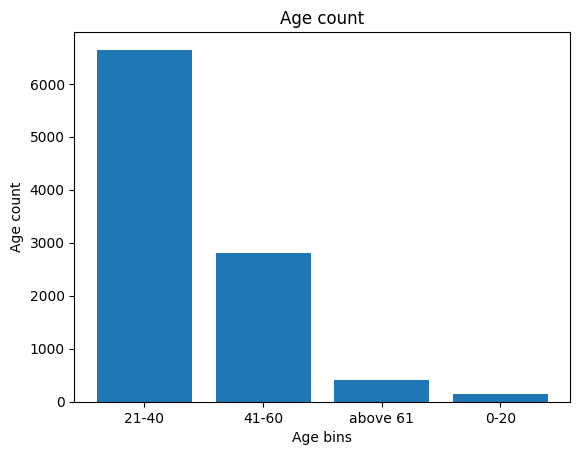

In [ ]:
# # making charts 
counts = df['Age_bins'].value_counts()

plt.bar(counts.index, counts.values)
plt.title('Age count')
plt.xlabel('Age bins')
plt.ylabel('Age count')
plt.show()

